# Application to imaging

In [ ]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
from ipywidgets import interact, interactive, interact_manual
import ipywidgets as widgets
from IPython.display import display
%matplotlib inline

In [ ]:
vmin = 0
vmax = 1
image_bias = 1 # sometimes 1
def plot_svd(A):
    n = len(A)
    imshow(image_bias-A, cmap='gray', vmin=vmin, vmax=vmax)
    plt.show()
    U, S, V = svd(A)

    imgs = []
    for i in range(n):
        imgs.append(S[i]*np.outer(U[:,i],V[i]))

    combined_imgs = []
    for i in range(n):
        img = sum(imgs[:i+1])
        combined_imgs.append(img)
        
    fig, axes = plt.subplots(figsize = (n*n,n), nrows = 1, ncols = n, sharex=True, sharey=True)
    for num, ax in zip(range(n), axes):
        ax.imshow(image_bias-imgs[num], cmap='gray', vmin=vmin, vmax=vmax)
        ax.set_title(np.round(S[num],2), fontsize=80)
    plt.show()
    
    fig, axes = plt.subplots(figsize = (n*n,n), nrows = 1, ncols = n, sharex=True, sharey=True)
    for num, ax in zip(range(n), axes):
        ax.imshow(image_bias-combined_imgs[num], cmap='gray', vmin=vmin, vmax=vmax)
    plt.show()

    return U,S,V

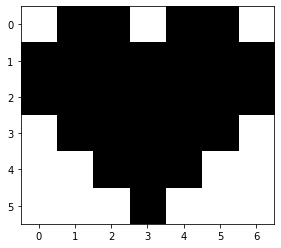

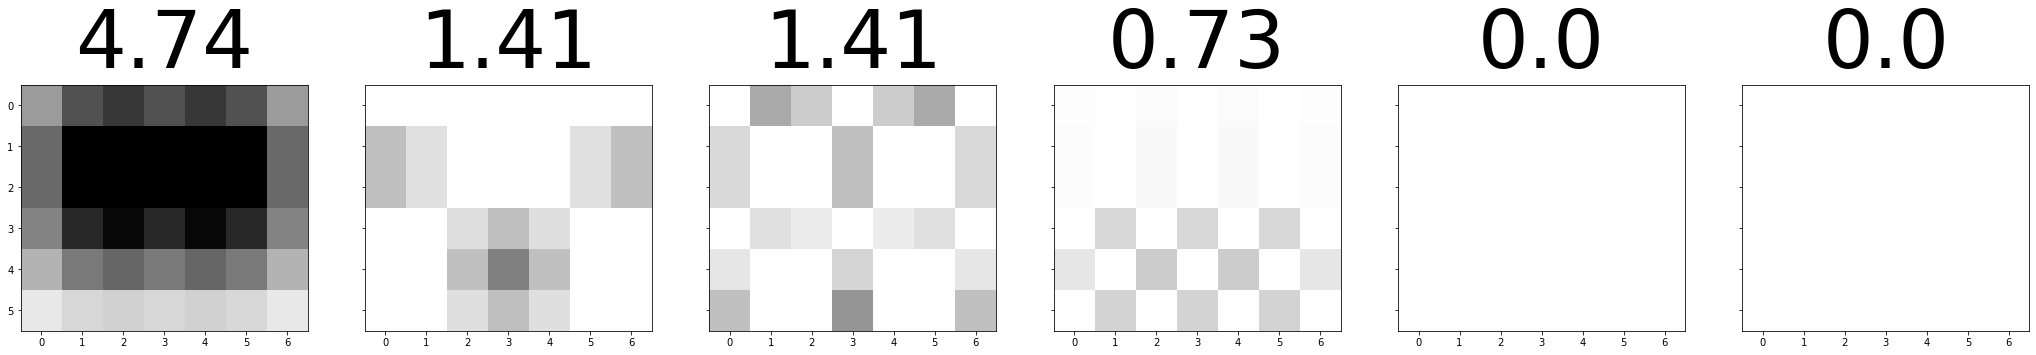

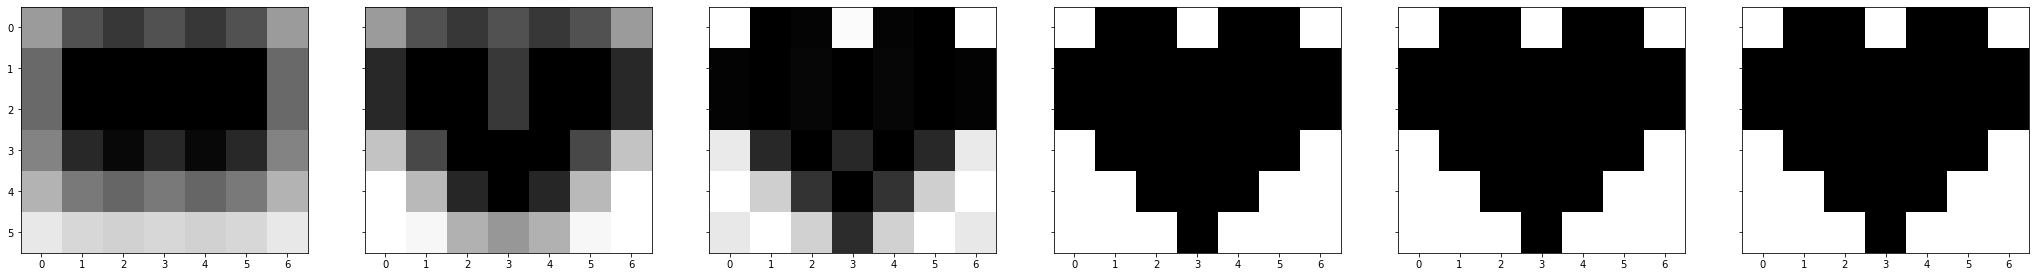

In [ ]:
D = np.array([[0,1,1,0,1,1,0],
              [1,1,1,1,1,1,1],
              [1,1,1,1,1,1,1],
              [0,1,1,1,1,1,0],
              [0,0,1,1,1,0,0],
              [0,0,0,1,0,0,0],
             ])
U,S,V = plot_svd(D)

In [ ]:
print(np.round(U,2))
print()
sigma = np.diag(S)
print(np.round(sigma,2))
print()
print(np.round(V,2))

# Different shapes

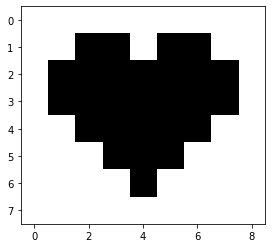

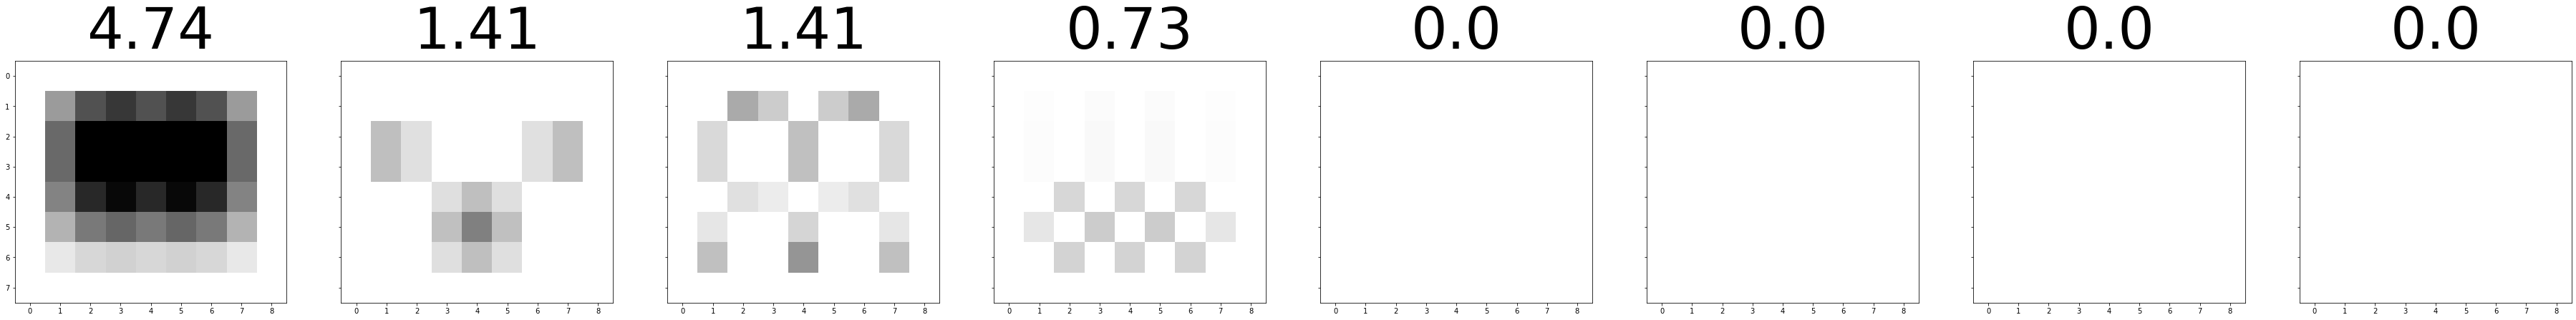

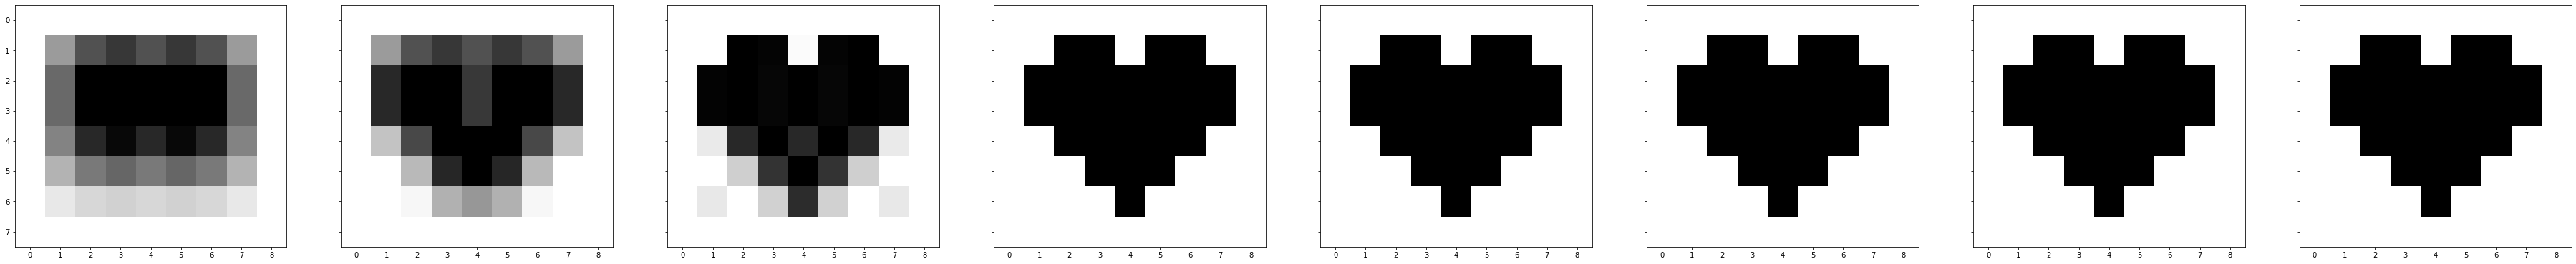

In [ ]:
C = np.array([[0,0,0,0,0,0,0,0,0],
              [0,0,1,1,0,1,1,0,0],
              [0,1,1,1,1,1,1,1,0],
              [0,1,1,1,1,1,1,1,0],
              [0,0,1,1,1,1,1,0,0],
              [0,0,0,1,1,1,0,0,0],
              [0,0,0,0,1,0,0,0,0],
              [0,0,0,0,0,0,0,0,0]
             ])
U,S,V = plot_svd(C)

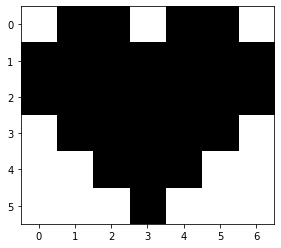

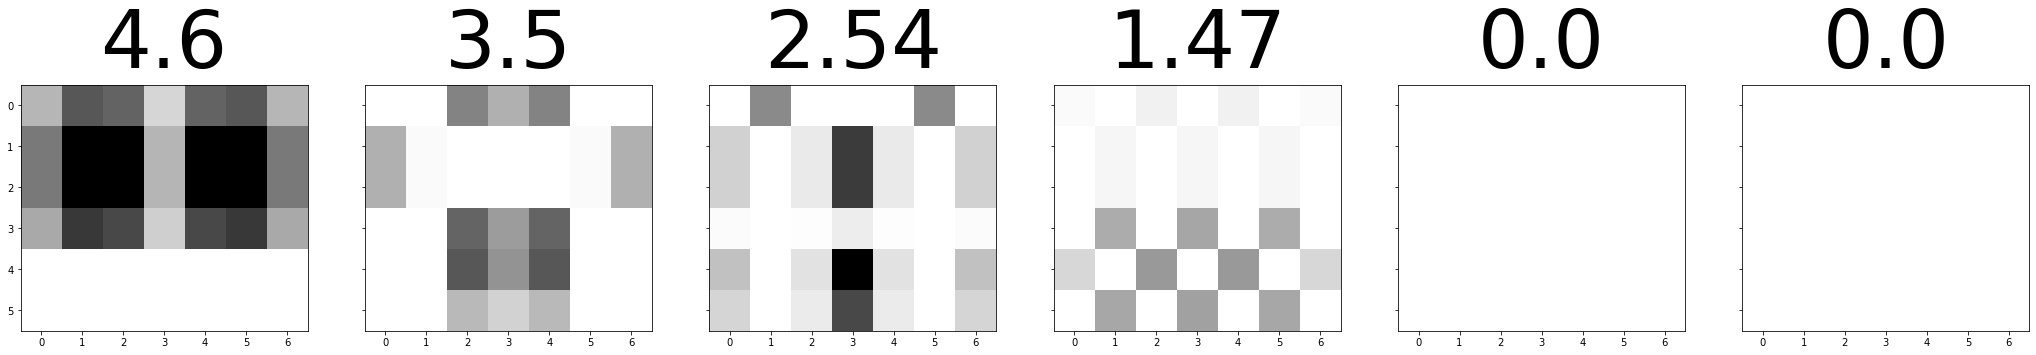

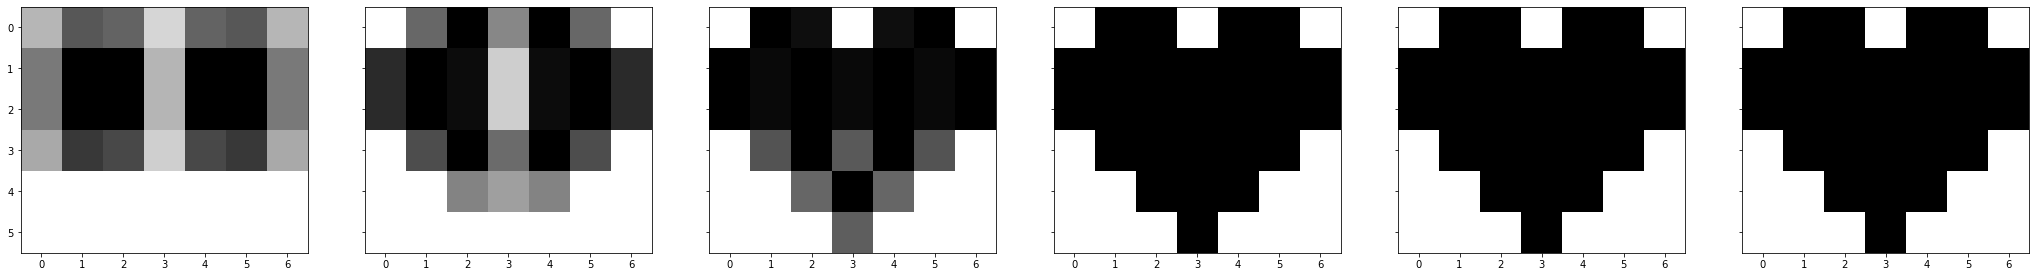

In [ ]:
D = np.array([[-1,1,1,-1,1,1,-1],
              [1,1,1,1,1,1,1],
              [1,1,1,1,1,1,1],
              [-1,1,1,1,1,1,-1],
              [-1,-1,1,1,1,-1,-1],
              [-1,-1,-1,1,-1,-1,-1],
             ])
U,S,V = plot_svd(D)

In [ ]:
D = np.array([[0,0,1,1,0,0],
              [0,1,1,1,1,0],
              [1,1,1,1,1,1],
              [1,1,1,1,1,1],
              [0,1,1,1,1,0],
              [0,0,1,1,0,0],
             ])
U,S,V = plot_svd(D)

In [ ]:
images = {
    "Git": np.asarray(Image.open('image.jpg')),
    "Musk": np.asarray(Image.open('elon.jpg')),
    "Virus": np.asarray(Image.open('covid.jpeg')),
}

In [ ]:
def show_images(img_name):
    'It will show image in widgets'
    print("Loading...")
    plt.title("Image Name: "+img_name+"\n")
    plt.imshow(images[img_name])
    plt.axis('off')
    plt.show()

In [ ]:
interact(show_images, img_name=list(images.keys()))

interactive(children=(Dropdown(description='img_name', options=('Git', 'Musk', 'Virus'), value='Git'), Output(…

<function __main__.show_images>

In [ ]:
compressed_image = None
text = None

In [ ]:
def on_save_clicked(b):
    img_name = text.value.split()[0]
    print("saving image...")
    compressed_image.save(img_name+".jpg")
    print("image saved.")
    
    
def compress_image(img_name, k):
    print("processing...")
    global text
    global compressed_image
    img = images[img_name]
    
    r = img[:,:,0]
    g = img[:,:,1]
    b = img[:,:,2]
    
    print("compressing...")
    ur,sr,vr = svd(r, full_matrices=False)
    ug,sg,vg = svd(g, full_matrices=False)
    ub,sb,vb = svd(b, full_matrices=False)
    rr = np.dot(ur[:,:k],np.dot(np.diag(sr[:k]), vr[:k,:]))
    rg = np.dot(ug[:,:k],np.dot(np.diag(sg[:k]), vg[:k,:]))
    rb = np.dot(ub[:,:k],np.dot(np.diag(sb[:k]), vb[:k,:]))
    
    print("arranging...")
    rimg = np.zeros(img.shape)
    rimg[:,:,0] = rr
    rimg[:,:,1] = rg
    rimg[:,:,2] = rb
    
    for ind1, row in enumerate(rimg):
        for ind2, col in enumerate(row):
            for ind3, value in enumerate(col):
                if value < 0:
                    rimg[ind1,ind2,ind3] = abs(value)
                if value > 255:
                    rimg[ind1,ind2,ind3] = 255

    compressed_image = rimg.astype(np.uint8)
    
    plt.title("Image Name: "+img_name+"\n")
    plt.imshow(compressed_image)
    plt.axis('off')
    plt.show()
    
    save = widgets.Button(description="Save image!", button_style='danger')
    save.on_click(on_save_clicked)
    
    compressed_image = Image.fromarray(compressed_image)
    
    text = widgets.Text(value="image_save",placeholder='Enter image name...',description='Image name')
    display(text)
    display(save)
    

In [ ]:
interact(compress_image, img_name=list(images.keys()), k = (0,200))

interactive(children=(Dropdown(description='img_name', options=('Git', 'Musk', 'Virus'), value='Git'), IntSlid…

<function __main__.compress_image>